In [1]:
from nltk.stem import WordNetLemmatizer
import contractions
import string
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [2]:
passages = open('passage-collection.txt').read()

In [3]:
passages = passages.split("\n")

In [54]:
def normalise(text):
    '''
    Function that normalises text and returns tokens.
    Input: text --> text string we want to tokenise
    Output: tokens --> list of tokens taken from the text string
    '''

    text = text.lower() # convert all to lower case
    text = contractions.fix(text) # expand contractions
    # text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) # remove punctuation
    tokens = text.split()
    # tokens = re.findall(r'(\b[a-z|1-9|\S]+\b)', text) # tokenisation
    tokens = list(map(lemmatizer.lemmatize, tokens)) # lemmatization of nouns

    return tokens

In [4]:
def normalise(text):
    '''
    Function that normalises text and returns tokens.
    Input: text --> text string we want to tokenise
    Output: tokens --> list of tokens taken from the text string
    '''

    text = text.lower() # convert all to lower case
    text = contractions.fix(text) # expand contractions
    # text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    tokens = text.split()
    # tokens = re.findall(r'(\b[a-z|1-9|\S]+\b)', text) # tokenisation
    filtered_tokens = [w for w in tokens if not w in stop_words] # remove stop words
    filtered_tokens = list(map(lemmatizer.lemmatize, filtered_tokens)) # lemmatization of nouns

    return filtered_tokens

In [5]:
tokens = []
for i in range(len(passages)):
    tokens.extend(normalise(passages[i]))

In [6]:
def term_occ(tokens):
    '''
    This function counts the number of occurrences of terms in a text.
    
    Input
    tokens: list of string tokens taken from a body of text
    
    Output
    terms: list of unique terms encountered in the tokens list
    occurrences: list of the number of occurrences of each term in the terms list
    '''

    frequency = {}

    for word in tokens:
        count = frequency.get(word,0)
        frequency[word] = count + 1

    frequency_rev = dict(sorted(frequency.items(), key=lambda item: item[1]))
    terms = list(frequency_rev.keys())[::-1]
    occurrences = list(frequency_rev.values())[::-1]

    return terms, occurrences

In [7]:
terms, occurrences = term_occ(tokens)

In [58]:
# with open("terms", "wb") as fp: # Pickling
#     pickle.dump(terms, fp)

In [8]:
print(f'The top 10 terms in the passages and their occurrences are:\n {dict(zip(terms[:10],occurrences[:10]))}')

The top 10 terms in the passages and their occurrences are:
 {'1': 43579, '2': 33686, 'one': 27911, 'name': 27417, 'number': 25754, 'year': 24818, '3': 22335, 'also': 21740, 'cost': 21132, 'may': 20564}


In [18]:
norm_freq = np.array(occurrences) / sum(occurrences)
ranking = list(range(1,len(occurrences)+1))

f_theory = 1 / (np.sum(1/np.array(ranking)) * np.array(ranking))

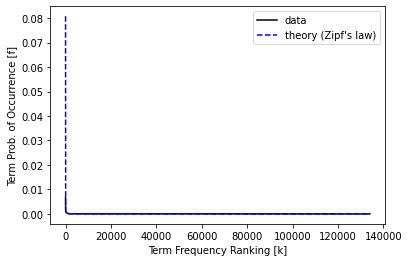

In [19]:
plt.figure(1)
plt.plot(ranking, norm_freq, 'k', label='data')
plt.plot(ranking, f_theory, '--b', label="theory (Zipf's law)")
plt.xlabel('Term Frequency Ranking [k]')
plt.ylabel('Term Prob. of Occurrence [f]')
plt.legend()
# plt.savefig('fig1.jpg')
plt.show()

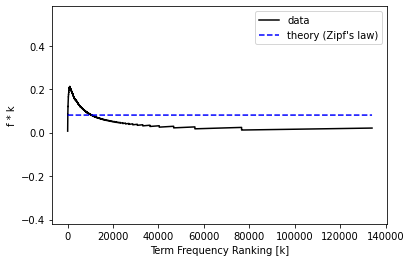

In [20]:
plt.figure(2)
plt.plot(ranking, norm_freq * np.array(ranking), 'k', label='data')
plt.plot(ranking, f_theory * np.array(ranking), '--b', label="theory (Zipf's law)")
plt.xlabel('Term Frequency Ranking [k]')
plt.ylabel('f * k')
plt.legend()
plt.ylim((f_theory[0] * np.array(ranking)[0] - 0.5, f_theory[0] * np.array(ranking)[0] + 0.5))
# plt.savefig('fig2.jpg')
plt.show()

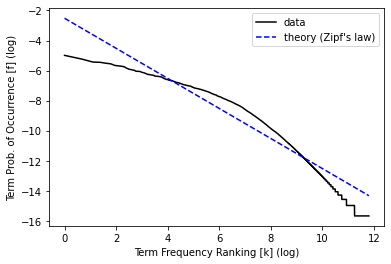

In [21]:
plt.figure(3)
plt.plot(np.log(np.array(ranking)), np.log(norm_freq), 'k', label='data')
plt.plot(np.log(np.array(ranking)), np.log(f_theory), '--b', label="theory (Zipf's law)")
plt.xlabel('Term Frequency Ranking [k] (log)')
plt.ylabel('Term Prob. of Occurrence [f] (log)')
plt.legend()
# plt.savefig('fig3.jpg')
plt.show()